<a href="https://colab.research.google.com/github/ZaimAzmi/Time_series_analysis/blob/main/Project_TSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load data
df = pd.read_csv('proj.csv', header=0, index_col=0)
df

,LabourForce
Year,
Dec-82,2033.1
Dec-83,2063.5
Dec-84,2130.9
Dec-85,2179.4
Dec-86,2157.5
Dec-87,2192.3
Dec-88,2243.1
Dec-89,2297.1
Dec-90,2325.4


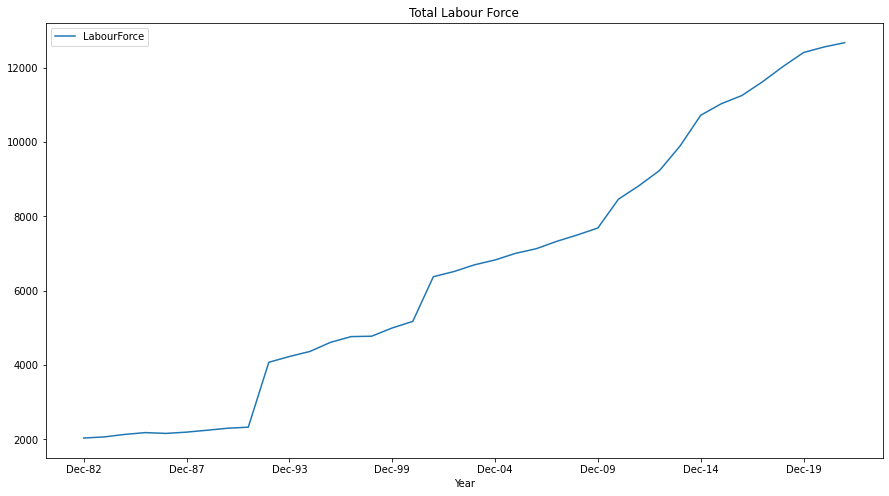

In [ ]:
#plot the time series data
df.plot(figsize=(15, 8),title = 'Total Labour Force', fontsize = 10)
plt.show()

<Figure size 432x288 with 0 Axes>

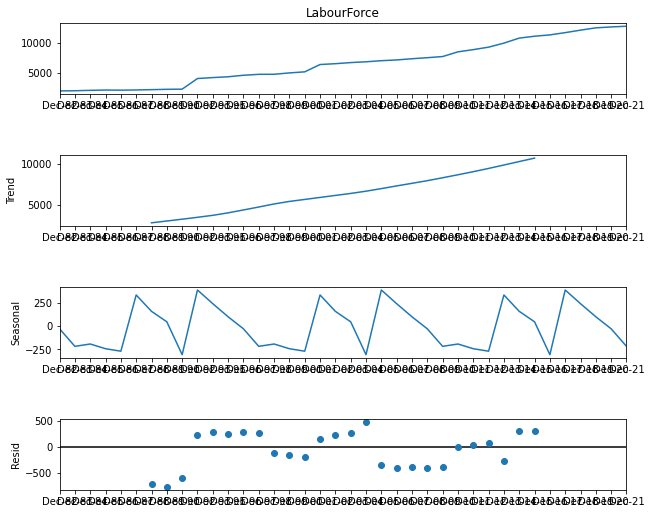

In [ ]:
#decompose to see the data pattern
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df.LabourForce, period=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(10, 8)

In [ ]:
#Partition data into in-sample & out-sample
#devide 90% of the data
training = df[0:34] # in-sample data (training data)
testing = df[34:] #out-sample data (testing data)

In [ ]:
#display actual in-sample data
training.head(5)

,LabourForce
Year,
Dec-82,2033.1
Dec-83,2063.5
Dec-84,2130.9
Dec-85,2179.4
Dec-86,2157.5


In [ ]:
#display actual out-sample data
testing.head(5)

,LabourForce
Year,
Dec-10,8465.6
Dec-11,8829.2
Dec-12,9238.9
Dec-13,9900.6
Dec-14,10725.7


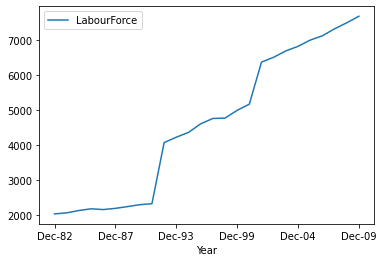

In [ ]:
#import and plot the in-sample data
from matplotlib import pyplot
training.plot()
pyplot.show()

cyclical treand because of year

In [ ]:
#Box-cox transformation (check stationarity)
Labour = training.LabourForce
import scipy as sp
from scipy.stats import boxcox
Labour, lam = boxcox(Labour)
lam

0.5007598523761769

need to transform

In [ ]:
#transform in-sample data using 1/sqrt(y(t))
transform_training = 1/np.sqrt(training)
transform_training.head(5)

,LabourForce
Year,
Dec-82,0.022178
Dec-83,0.022014
Dec-84,0.021663
Dec-85,0.021421
Dec-86,0.021529


In [ ]:
#stationary in-mean test using ADF test for transform in-sample data
from statsmodels.tsa.stattools import adfuller
print("p-value:", adfuller(transform_training.dropna())[1])

p-value: 0.12208684782206092


/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


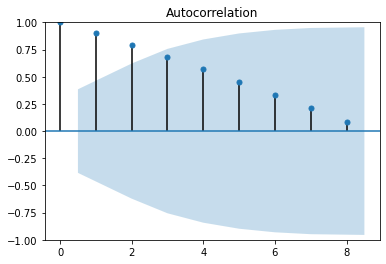

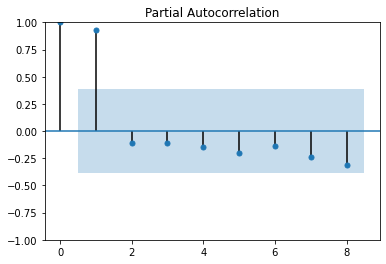

In [ ]:
#plot acf and pacf for the non-stationarity in-mean
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(transform_training, lags = 8),plot_pacf(transform_training, lags=8)
plt.show()

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#use auto.arima for the best model (looking at the smallest AIC value)
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(transform_training, start_p=1, start_q=1,
                           max_p=2, max_q=2, m=12,
                           start_P=0,start_Q=0,max_P=3,max_Q=3, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
print(stepwise_model.aic())
print(stepwise_model.bic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=-126.874, Time=0.25 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-131.697, Time=0.16 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-127.728, Time=0.44 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-126.984, Time=0.14 sec


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-129.698, Time=0.15 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-129.698, Time=0.29 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=-127.697, Time=0.22 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-129.728, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-128.984, Time=0.07 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=-130.452, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 1.904 seconds
-131.6974193600546
-131.13247000259307


In [ ]:
arima

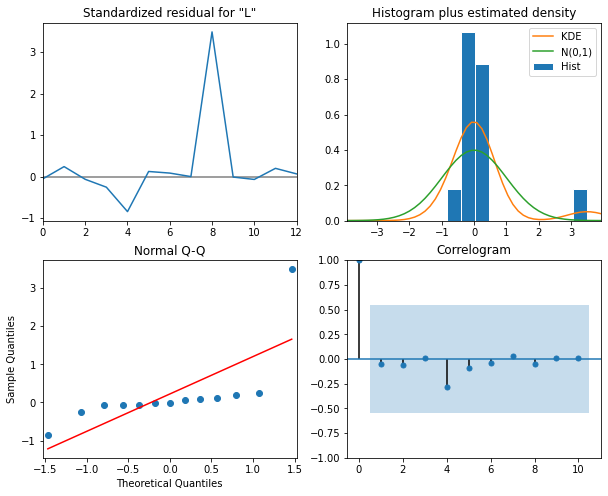

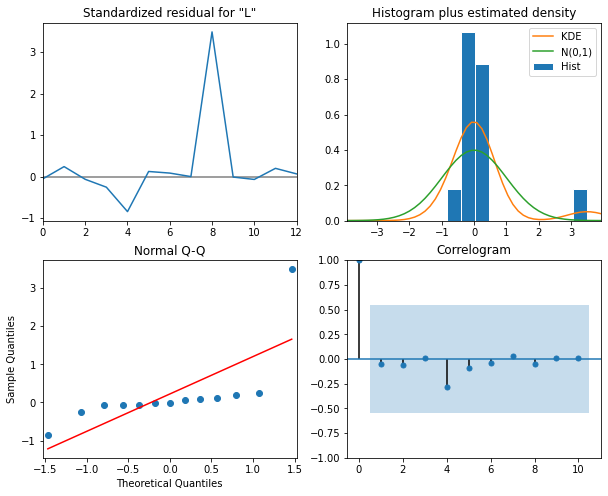

In [ ]:
#visualise the diagnostic checking
results.plot_diagnostics(figsize=(10,8))

In [ ]:
#display the residual
residuals = pd.DataFrame(results.resid)
residuals.head(5)

,0
Year,
Dec-82,0.022178
Dec-83,-0.000164
Dec-84,-0.000351
Dec-85,-0.000242
Dec-86,0.000108


In [ ]:
#test serial correlation on residuals (residuals must be not correlated)
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(residuals, lags=[1], return_df=True)

,lb_stat,lb_pvalue
1,0.002962,0.956601


In [ ]:
#Ljung-Box test on squared residuals (homoscedasticity test).
import numpy as np
homoscedasticity = np.square(residuals)
acorr_ljungbox(homoscedasticity, lags=[1], return_df=True)

,lb_stat,lb_pvalue
1,0.014617,0.90377


In [ ]:
#Normality test using Jarque-Bera test
import scipy.stats as stats
stats.jarque_bera(residuals)

Jarque_beraResult(statistic=166.8211392460715, pvalue=0.0)

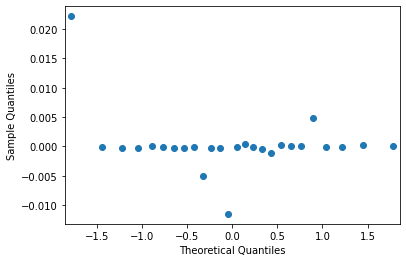

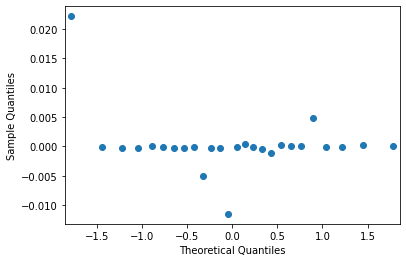

In [ ]:
#normal plot for residual
import statsmodels.api as sm
sm.qqplot(residuals)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f53b1fe9c70>]],
      dtype=object)

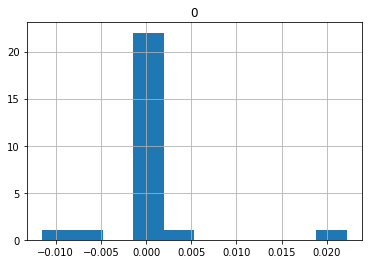

In [ ]:
#histogram for residual
residuals.hist()

In [ ]:
#forecast out-sample data
forecast = results.predict(start=transform_training.shape[0], end=transform_training.shape[0] + 11)
forecast

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


26    0.011401
27    0.011079
28    0.010834
29    0.009454
30    0.009320
31    0.009152
32    0.009034
33    0.008879
34    0.008775
35    0.008613
36    0.008478
37    0.008336
Name: predicted_mean, dtype: float64

In [ ]:
#convert forecasted out-sample data into dataframe
forecast = pd.DataFrame(forecast)
forecast

,predicted_mean
26,0.011401
27,0.011079
28,0.010834
29,0.009454
30,0.009320
31,0.009152
32,0.009034
33,0.008879
34,0.008775
35,0.008613


In [ ]:
#retransform the forecasted out-sample data
retransform_forecast_data =(1/(forecast)**2)
retransform_forecast_data

,predicted_mean
26,7693.890068
27,8147.551593
28,8519.147590
29,11188.252430
30,11511.722947
31,11939.821772
32,12252.904339
33,12685.274677
34,12987.691274
35,13481.145247


In [ ]:
#round up forecasted out-sample data into whole number
forecast_data = retransform_forecast_data.round({"predicted_mean":0})
forecast_data

,predicted_mean
26,7694.0
27,8148.0
28,8519.0
29,11188.0
30,11512.0
31,11940.0
32,12253.0
33,12685.0
34,12988.0
35,13481.0


In [ ]:
#reset index for forecasted out-sample data (to combine actual out-sample data with forecasted out-sample data)
forecast_data1=forecast_data.reset_index()
forecast_data2=forecast_data1.drop(['index'],axis=1)
forecast_data2

,predicted_mean
0,7694.0
1,8148.0
2,8519.0
3,11188.0
4,11512.0
5,11940.0
6,12253.0
7,12685.0
8,12988.0
9,13481.0


In [ ]:
#display actual out-sample data
testing

,LabourForce
Year,
Dec-10,8465.6
Dec-11,8829.2
Dec-12,9238.9
Dec-13,9900.6
Dec-14,10725.7
Dec-15,11035.9
Dec-16,11256.6
Dec-17,11625.8
Dec-18,12037.2


In [ ]:
#reset index for actual out-sample data
testing1=testing.reset_index()#reset index
testing1

,Year,LabourForce
0,Dec-10,8465.6
1,Dec-11,8829.2
2,Dec-12,9238.9
3,Dec-13,9900.6
4,Dec-14,10725.7
5,Dec-15,11035.9
6,Dec-16,11256.6
7,Dec-17,11625.8
8,Dec-18,12037.2
9,Dec-19,12415.2


In [ ]:
#combine actual with forecasted out-sample data
frames = [testing1, forecast_data2]
result = pd.concat(frames,axis=1)
result

,Year,LabourForce,predicted_mean
0,Dec-10,8465.6,7694.0
1,Dec-11,8829.2,8148.0
2,Dec-12,9238.9,8519.0
3,Dec-13,9900.6,11188.0
4,Dec-14,10725.7,11512.0
5,Dec-15,11035.9,11940.0
6,Dec-16,11256.6,12253.0
7,Dec-17,11625.8,12685.0
8,Dec-18,12037.2,12988.0
9,Dec-19,12415.2,13481.0


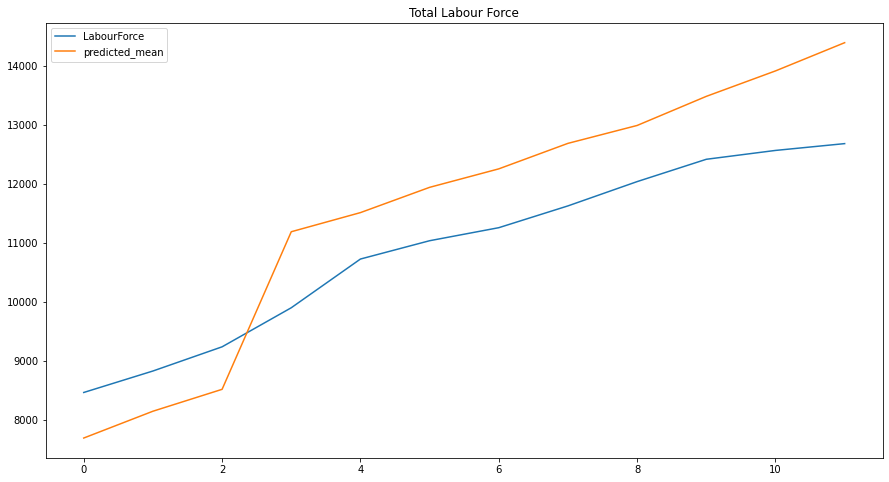

In [ ]:
#plot comparison actual out-sample with forecasted out-sample
result.plot(figsize=(15, 8),title = 'Total Labour Force', fontsize = 10)
plt.show()

In [ ]:
#forecast evaluation using : MAPE
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) *100
mean_absolute_percentage_error(forecast_data, (testing))

8.834816026488944

In [ ]:
#forecast one-step ahead
futureforecast = results.forecast(steps=24)
futureforecast

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


26    0.011401
27    0.011079
28    0.010834
29    0.009454
30    0.009320
31    0.009152
32    0.009034
33    0.008879
34    0.008775
35    0.008613
36    0.008478
37    0.008336
38    0.008333
39    0.008011
40    0.007767
41    0.006387
42    0.006253
43    0.006085
44    0.005967
45    0.005812
46    0.005708
47    0.005545
48    0.005411
49    0.005269
Name: predicted_mean, dtype: float64

In [ ]:
#retransform one-step ahead forecast
retransform_futureforecast =(1/(futureforecast)**2)
retransform_futureforecast

26     7693.890068
27     8147.551593
28     8519.147590
29    11188.252430
30    11511.722947
31    11939.821772
32    12252.904339
33    12685.274677
34    12987.691274
35    13481.145247
36    13912.050729
37    14390.040691
38    14399.743580
39    15580.308727
40    16575.869885
41    24514.337640
42    25574.422324
43    27011.494937
44    28087.435716
45    29608.579915
46    30697.207270
47    32517.935612
48    34153.749289
49    36019.411642
Name: predicted_mean, dtype: float64

In [ ]:
#convert one-step ahead data into data frame
forecasting = pd.DataFrame(retransform_futureforecast)
forecasting

,predicted_mean
26,7693.890068
27,8147.551593
28,8519.147590
29,11188.252430
30,11511.722947
31,11939.821772
32,12252.904339
33,12685.274677
34,12987.691274
35,13481.145247


In [ ]:
#round up one-step ahead forecast into whole number
forecasting_data = forecasting.round({"predicted_mean":0})
forecasting_data

,predicted_mean
26,7694.0
27,8148.0
28,8519.0
29,11188.0
30,11512.0
31,11940.0
32,12253.0
33,12685.0
34,12988.0
35,13481.0


In [ ]:
#reset index for forecasted one-step ahead data
forecast_data3=forecasting_data.reset_index()#reset index
forecast_data4=forecast_data3.drop(['index'],axis=1)
forecast_data4

,predicted_mean
0,7694.0
1,8148.0
2,8519.0
3,11188.0
4,11512.0
5,11940.0
6,12253.0
7,12685.0
8,12988.0
9,13481.0


In [ ]:
#combine actual with forecasted one-steap ahead forecast
frames = [testing1, forecast_data4]
result2 = pd.concat(frames,axis=1)
result2

,Year,LabourForce,predicted_mean
0,Dec-10,8465.6,7694.0
1,Dec-11,8829.2,8148.0
2,Dec-12,9238.9,8519.0
3,Dec-13,9900.6,11188.0
4,Dec-14,10725.7,11512.0
5,Dec-15,11035.9,11940.0
6,Dec-16,11256.6,12253.0
7,Dec-17,11625.8,12685.0
8,Dec-18,12037.2,12988.0
9,Dec-19,12415.2,13481.0


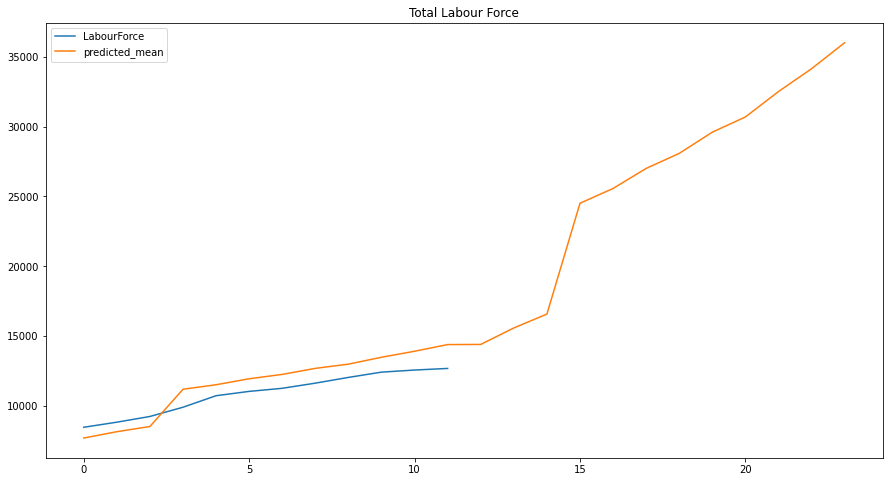

In [ ]:
#plot comparison actual data with forecasted data
result2.plot(figsize=(15, 8),title = 'Total Labour Force', fontsize = 10)
plt.show()